In [2]:
# Packages for data
import pandas as pd
import numpy as np

# Packages for machine learning models
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import cross_validate

from sklearn.metrics import accuracy_score, roc_curve, auc, recall_score, f1_score, precision_score, classification_report, confusion_matrix, auc, log_loss

# Text processing packages
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
import re

# Packages for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import scikitplot.plotters as skplt 

In [3]:
def remove_hashtag_mentions_urls(text):
    # e.sub(r"(?:\@|https?\://)\S+", "", text) # remove mentions and url only
    return re.sub(r"(?:\@|\#|https?\://)\S+", "", text)

In [4]:
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy', 'balanced_accuracy']

def print_cross_validation_result(cross_val_result):
    print("Cross Accuracy : ",round(cross_val_result['test_accuracy'].mean() * 100 , 2),"%")
    print("Cross Validation Precision : ",round(cross_val_result['test_precision_macro'].mean() * 100 , 2),"%")
    print("Cross Validation Recall : ",round(cross_val_result['test_recall_macro'].mean() * 100 , 2),"%")
    print("Cross Validation F1 : ",round(cross_val_result['test_f1_macro'].mean() * 100 , 2),"%")

In [5]:
models_dict = {
    'Logistic Regression':LogisticRegression(),
    # 'Naive Bayes Multinomial':MultinomialNB(),
    'Naive Bayes Gaussian':GaussianNB(),
    'Decision Trees':DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators = 500, random_state=10),
    'SVM linear': svm.SVC(kernel='linear', probability=True),
    'SVM rbf': svm.SVC(kernel='rbf', probability=True),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False)
}

# Modelling using Bag of Words (CountVectorizer)

In [124]:
df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/thoughtful_comments_final.csv')

best_model = {
    # 'Unthoughtful sample size': 0, 
    'Best Model': None, 
    'Accuracy': 0, 
    'Precision': 0, 
    'Recall': 0, 
    'F1': 0
}

# for n in range(205, 1756, 25):
df_sample_0 = df[df['Thoughtful?'] == 0].sample(205, random_state=999)
df_sample_1 = df[df['Thoughtful?'] == 1].sample(205, random_state=999)
df_sample = pd.concat([df_sample_0, df_sample_1])
sentences = df_sample['Comment'].values
y = df_sample['Thoughtful?'].values

for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=999)

vectorizer = CountVectorizer(max_features=1650, min_df=0.15) # max_features=500, min_df=0.01
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)

for model_name in models_dict:
    model = models_dict[model_name]

    # print(f'{model_name}')
    # print('-'*50)
    cross_val_scores = cross_validate(estimator = model, X = X_train, y = y_train, scoring=scoring, cv = 5, n_jobs = -1)
    # print_cross_validation_result(cross_val_scores) 
    # print()
    if cross_val_scores['test_f1_macro'].mean() > best_model['F1']:
        # best_model['Unthoughtful sample size'] = n
        best_model['Best Model'] = model_name
        best_model['Accuracy'] = round(cross_val_scores['test_accuracy'].mean(), 3)
        best_model['Precision'] = round(cross_val_scores['test_precision_macro'].mean(), 3)
        best_model['Recall'] = round(cross_val_scores['test_recall_macro'].mean(), 3)
        best_model['F1'] = round(cross_val_scores['test_f1_macro'].mean(), 3)

for k, v in best_model.items():
    print(f'{k}: {v}')

Best Model: SVM rbf
Accuracy: 0.85
Precision: 0.855
Recall: 0.849
F1: 0.849


In [126]:
df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/thoughtful_comments_final.csv')

df_sample_0 = df[df['Thoughtful?'] == 0].sample(205, random_state=999)
df_sample_1 = df[df['Thoughtful?'] == 1].sample(205, random_state=999)
df_sample = pd.concat([df_sample_0, df_sample_1])
sentences = df_sample['Comment'].values
y = df_sample['Thoughtful?'].values

validation_df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/validation_comments_final.csv')
validation_sentences = validation_df['Comment'].values
validation_y = validation_df['Thoughtful?'].values

for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

best_config = {
    # 'Max features': 0, 
    'Best model': None,
    'Accuracy': 0, 
    'Precision': 0, 
    'Recall': 0, 
    'F1': 0
}


# for n in range(500, 7000, 50):
vectorizer = CountVectorizer(max_features=1650, max_df=0.15) # max_features=500, min_df=0.01
vectorizer.fit(sentences)
X_train = vectorizer.transform(sentences)

validation_X_test = vectorizer.transform(validation_sentences)

for model_name in models_dict:
    model = models_dict[model_name]
    model.fit(X_train, y)
    predictions = model.predict(validation_X_test)

    acc = accuracy_score(validation_y,predictions)  # always true label first, then your predicted labels!
    precision = precision_score(validation_y,predictions) 
    recall = recall_score(validation_y,predictions) 
    f1 = f1_score(validation_y,predictions)

    if f1 > best_config['F1']:
        best_config['Best model'] = model_name
        best_config['Accuracy'] = round(acc, 3)
        best_config['Precision'] = round(precision, 3)
        best_config['Recall'] = round(recall, 3)
        best_config['F1'] = round(f1, 3)

for k, v in best_config.items():
    print(f'{k}: {v}')

[23:47:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best model: SVM rbf
Accuracy: 0.924
Precision: 0.543
Recall: 0.745
F1: 0.628


In [122]:
df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/thoughtful_comments_final.csv')

df_sample_0 = df[df['Thoughtful?'] == 0].sample(205, random_state=999)
df_sample_1 = df[df['Thoughtful?'] == 1].sample(205, random_state=999)
df_sample = pd.concat([df_sample_0, df_sample_1])
sentences = df_sample['Comment'].values
y = df_sample['Thoughtful?'].values

validation_df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/validation_comments_final.csv')
validation_sentences = validation_df['Comment'].values
validation_y = validation_df['Thoughtful?'].values

for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

best_config_min_df = {
    'min_df': 0, 
    'Accuracy': 0, 
    'Precision': 0, 
    'Recall': 0, 
    'F1': 0
}


# for n in range(20, 101):
#     min_df = n/100
#     print(n)
vectorizer = CountVectorizer(max_features=1650, max_df=0.15) # max_features=500, min_df=0.01
vectorizer.fit(sentences)
X_train = vectorizer.transform(sentences)

validation_X_test = vectorizer.transform(validation_sentences)

model = svm.SVC(kernel='rbf')
model.fit(X_train, y)
predictions = model.predict(validation_X_test)

acc = accuracy_score(validation_y,predictions)  # always true label first, then your predicted labels!
precision = precision_score(validation_y,predictions) 
recall = recall_score(validation_y,predictions) 
f1 = f1_score(validation_y,predictions)

if f1 > best_config_min_df['F1']:
    # best_config_min_df['min_df'] = min_df
    best_config_min_df['Accuracy'] = round(acc, 3)
    best_config_min_df['Precision'] = round(precision, 3)
    best_config_min_df['Recall'] = round(recall, 3)
    best_config_min_df['F1'] = round(f1, 3)

for k, v in best_config_min_df.items():
    print(f'{k}: {v}')

min_df: 1.0
Accuracy: 0.924
Precision: 0.543
Recall: 0.745
F1: 0.628


# Modelling using TF-IDF (TfidfVectorizer) with 5 features

In [6]:
df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/thoughtful_comments_final.csv')

In [7]:
df_sample_0 = df[df['Thoughtful?'] == 0].sample(205, random_state=999)
df_sample_1 = df[df['Thoughtful?'] == 1].sample(205, random_state=999)
df_sample = pd.concat([df_sample_0, df_sample_1])
sentences = df_sample['Comment'].values
y = df_sample['Thoughtful?'].values

In [8]:
count_vectorizer = TfidfVectorizer(analyzer="word", preprocessor=None, max_features=None) 

In [9]:
for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=999)

In [10]:
tfidf = count_vectorizer.fit_transform(sentences_train)

len(count_vectorizer.get_feature_names())

3515

In [11]:
svd = TruncatedSVD(n_components=100, n_iter=25, random_state=12)
truncated_tfidf = svd.fit_transform(tfidf)

In [12]:
len(truncated_tfidf)

328

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
Logistic Regression
Log loss: 0.47930809582952194
Accuracy: 0.8475609756097561
Precision: 0.8535031847133758
Recall: 0.8322981366459627
F1: 0.8427672955974843


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s r

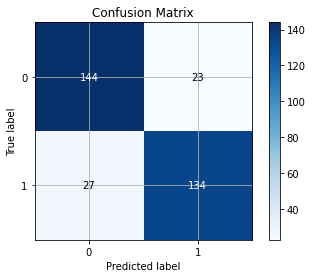

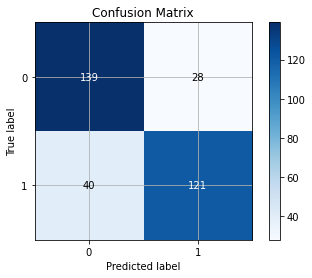

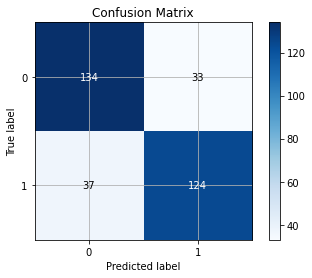

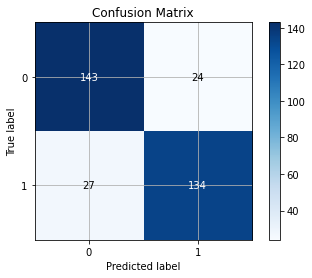

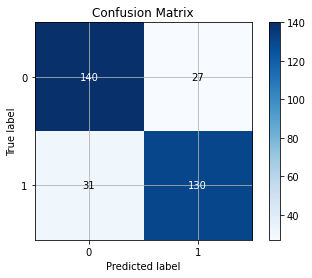

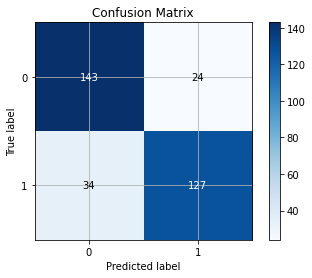

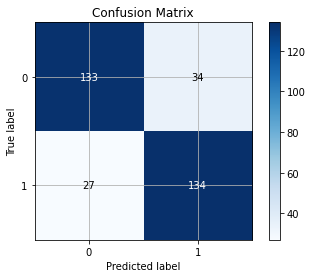

In [13]:
for model_name in models_dict:
    model = models_dict[model_name]

    probas = cross_val_predict(model, truncated_tfidf, y_train, cv=StratifiedKFold(), n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y_train)
    preds = classes[pred_indices]
    print(model_name)
    print('Log loss: {}'.format(log_loss(y_train, probas)))
    print('Accuracy: {}'.format(accuracy_score(y_train, preds)))
    print('Precision: {}'.format(precision_score(y_train, preds)))
    print('Recall: {}'.format(recall_score(y_train, preds)))
    print('F1: {}'.format(f1_score(y_train, preds)))
    skplt.plot_confusion_matrix(y_train, preds)
    print()
    print()

In [14]:
df_sample_0 = df[df['Thoughtful?'] == 0].sample(205, random_state=999)
df_sample_1 = df[df['Thoughtful?'] == 1].sample(205, random_state=999)
df_sample = pd.concat([df_sample_0, df_sample_1])
sentences = df_sample['Comment'].values
y = df_sample['Thoughtful?'].values
features = df_sample[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score']]

In [15]:
for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

features['sentences'] = sentences
# features.reset_index(inplace=True)

features_train, features_test, y_train, y_test = train_test_split(features, y, test_size=0.20, random_state=999)
sentences_train = features_train['sentences'].values
sentences_test = features_test['sentences'].values

<ipython-input-15-95a608d36e44>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features['sentences'] = sentences


In [16]:
v_tfidf = count_vectorizer.fit_transform(sentences_train)

len(count_vectorizer.get_feature_names())

3515

In [17]:
svd = TruncatedSVD(n_components=100, n_iter=25, random_state=12)
truncated_tfidf = svd.fit_transform(tfidf)

In [18]:
i = 0
truncated_tfidf_features = []
for row in features_train.iterrows():
    temp = list(truncated_tfidf[i])
    temp.append(row[1]['Length'])
    temp.append(row[1]['Average Loglikelihood'])
    temp.append(row[1]['Num Verbs'])
    temp.append(row[1]['Num Discourse Relations'])
    temp.append(row[1]['Relevance score'])
    truncated_tfidf_features.append(temp)

In [19]:
truncated_tfidf = np.array(truncated_tfidf_features)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-pac

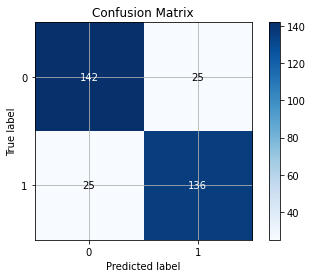

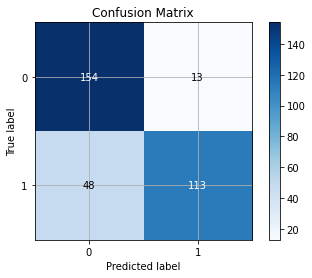

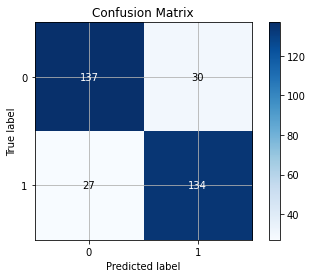

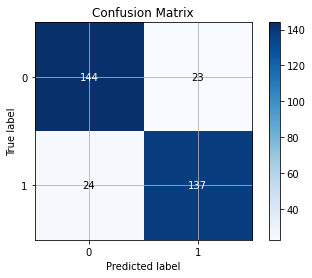

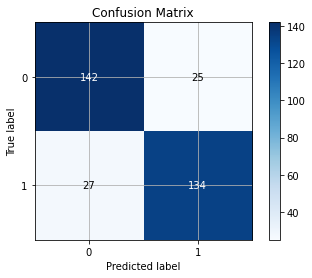

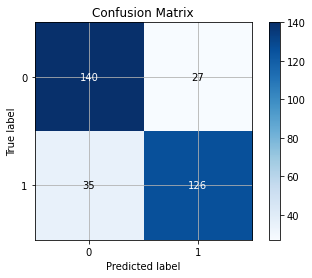

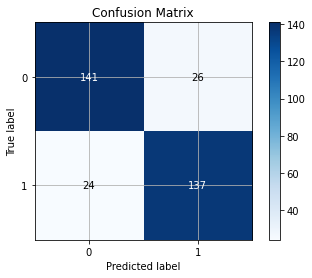

In [20]:
for model_name in models_dict:
    model = models_dict[model_name]

    probas = cross_val_predict(model, truncated_tfidf, y_train, cv=StratifiedKFold(), n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y_train)
    preds = classes[pred_indices]
    print(model_name)
    print('Log loss: {}'.format(log_loss(y_train, probas)))
    print('Accuracy: {}'.format(accuracy_score(y_train, preds)))
    print('Precision: {}'.format(precision_score(y_train, preds)))
    print('Recall: {}'.format(recall_score(y_train, preds)))
    print('F1: {}'.format(f1_score(y_train, preds)))
    skplt.plot_confusion_matrix(y_train, preds)
    print()
    print()

In [32]:
df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/thoughtful_comments_final.csv')

df_sample_0 = df[df['Thoughtful?'] == 0].sample(205, random_state=999)
df_sample_1 = df[df['Thoughtful?'] == 1].sample(205, random_state=999)
df_sample = pd.concat([df_sample_0, df_sample_1])
sentences = df_sample['Comment'].values
y = df_sample['Thoughtful?'].values

count_vectorizer = TfidfVectorizer(analyzer="word", preprocessor=None, max_features=None) 

for i, text in enumerate(sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    sentences[i] = text_joined

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=999)

tfidf = count_vectorizer.fit_transform(sentences_train)
svd = TruncatedSVD(n_components=200, n_iter=25, random_state=12)
truncated_tfidf = svd.fit_transform(tfidf)

i = 0
truncated_tfidf_features = []
for row in features_train.iterrows():
    temp = list(truncated_tfidf[i])
    temp.append(row[1]['Length'])
    temp.append(row[1]['Average Loglikelihood'])
    temp.append(row[1]['Num Verbs'])
    temp.append(row[1]['Num Discourse Relations'])
    temp.append(row[1]['Relevance score'])
    truncated_tfidf_features.append(temp)

truncated_tfidf = np.array(truncated_tfidf_features)


validation_df = pd.read_csv(f'/Users/chenjianyu/Desktop/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis/Data/Thoughtful Comments/validation_comments_final.csv')
validation_sentences = validation_df['Comment'].values
validation_y = validation_df['Thoughtful?'].values
validation_features = validation_df[['Length', 'Average Loglikelihood', 'Num Verbs', 'Num Discourse Relations', 'Relevance score']]

for i, text in enumerate(validation_sentences):
    text = remove_hashtag_mentions_urls(text)
    text_tokenize = TweetTokenizer().tokenize(text)
    text_lower = [w.lower() for w in text_tokenize]
    text_words_only = [w for w in text_lower if re.search('^[a-z]+$',w)]
    text_joined = ' '.join(text_words_only)
    validation_sentences[i] = text_joined

validation_features['sentences'] = validation_sentences
validation_features.reset_index(inplace=True)

validation_sentences = validation_features['sentences'].values

v_tfidf = count_vectorizer.fit_transform(validation_sentences)

svd = TruncatedSVD(n_components=200, n_iter=25, random_state=12)
truncated_v_tfidf = svd.fit_transform(v_tfidf)

i = 0
truncated_v_tfidf_features = []
for row in validation_features.iterrows():
    temp = list(truncated_v_tfidf[i])
    temp.append(row[1]['Length'])
    temp.append(row[1]['Average Loglikelihood'])
    temp.append(row[1]['Num Verbs'])
    temp.append(row[1]['Num Discourse Relations'])
    temp.append(row[1]['Relevance score'])
    truncated_v_tfidf_features.append(temp)

truncated_v_tfidf = np.array(truncated_v_tfidf_features)

for model_name in models_dict:
    model = models_dict[model_name]
    model.fit(truncated_tfidf, y_train)
    predictions = model.predict(truncated_v_tfidf)

    acc = accuracy_score(validation_y,predictions) # always true label first, then your predicted labels!
    precision = precision_score(validation_y,predictions) 
    recall = recall_score(validation_y,predictions) 
    f1 = f1_score(validation_y,predictions)

    print(model_name)
    print('-'*50)
    print('Accuracy Score for {} is {:.5f}'.format(model_name,acc))
    print('Precision Score for {} is {:.5f}'.format(model_name,precision))
    print('Recall Score for {} is {:.5f}'.format(model_name,recall))
    print('F1 Score for {} is {:.5f}'.format(model_name,f1))
    print()

<ipython-input-32-5c4215df09df>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_features['sentences'] = validation_sentences
Logistic Regression
--------------------------------------------------
Accuracy Score for Logistic Regression is 0.88533
Precision Score for Logistic Regression is 0.40860
Recall Score for Logistic Regression is 0.74510
F1 Score for Logistic Regression is 0.52778

Naive Bayes Gaussian
--------------------------------------------------
Accuracy Score for Naive Bayes Gaussian is 0.92917
Precision Score for Naive Bayes Gaussian is 0.57377
Recall Score for Naive Bayes Gaussian is 0.68627
F1 Score for Naive Bayes Gaussian is 0.62500

Decision Trees
--------------------------------------------------
Accuracy Score fo